In [21]:
import pandas as pd

df = pd.read_csv("C:/Users/sveng/Documents/Tilburg University/Master/Thesis/NoKeepers.csv")
pd.set_option('display.max_columns', None)

In [22]:
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40669 entries, 0 to 40668
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    40669 non-null  int64  
 1   fifa_version                 40669 non-null  int64  
 2   long_name                    40669 non-null  object 
 3   player_positions             40669 non-null  object 
 4   overall                      40669 non-null  int64  
 5   potential                    40669 non-null  int64  
 6   age                          40669 non-null  int64  
 7   height_cm                    40669 non-null  int64  
 8   weight_kg                    40669 non-null  int64  
 9   nationality_id               40669 non-null  int64  
 10  nationality_name             40669 non-null  object 
 11  weak_foot                    40669 non-null  int64  
 12  skill_moves                  40669 non-null  int64  
 13  pace            

Index(['player_id', 'fifa_version', 'long_name', 'player_positions', 'overall',
       'potential', 'age', 'height_cm', 'weight_kg', 'nationality_id',
       'nationality_name', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tac

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd

independent_variables = ['age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'preferred_foot_Left', 'preferred_foot_Right', 'Attacker', 'Midfielder',
       'Defender', 'Keeper']

target_variable = "big_potential"
X = df[independent_variables]
y = df[target_variable]

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Access feature importance
feature_importance = clf.feature_importances_

# Set a threshold for feature importance
threshold = 0.025  # Adjust as needed

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': independent_variables, 'Importance': feature_importance})

# Display features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

# Now 'selected_features' contains only the important features
print(selected_features)

                       Feature  Importance
0                          age    0.063440
1                    height_cm    0.025459
11          attacking_crossing    0.026375
13  attacking_heading_accuracy    0.026280
14     attacking_short_passing    0.026842
15           attacking_volleys    0.025498
16             skill_dribbling    0.028465
17                 skill_curve    0.025120
18           skill_fk_accuracy    0.025638
19          skill_long_passing    0.025438
20          skill_ball_control    0.027163
27               power_jumping    0.025226
28               power_stamina    0.025396
31        mentality_aggression    0.025023
34            mentality_vision    0.025518
35         mentality_penalties    0.027359
36         mentality_composure    0.027727


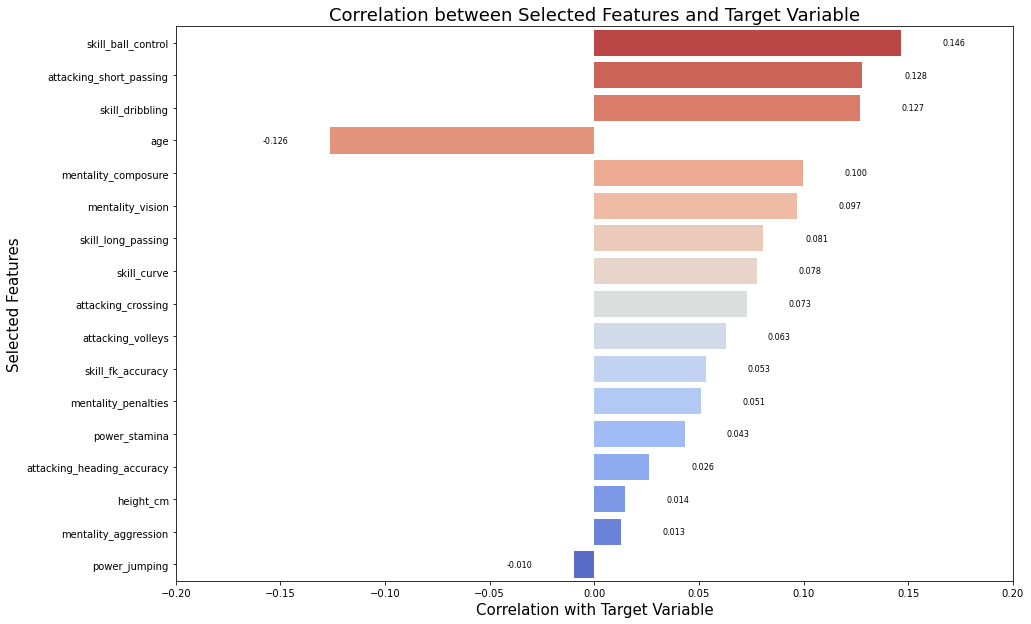

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame containing the data
# Extract the selected features along with the target variable
selected_features_with_target = df[selected_features['Feature'].values].copy()
selected_features_with_target[target_variable] = df[target_variable]

# Calculate the correlation between each selected feature and the target variable
correlation_with_target = selected_features_with_target.corr()[target_variable].drop(target_variable)

# Sort the y-axis labels based on the highest absolute values for x
sorted_features = correlation_with_target.abs().sort_values(ascending=False).index

# Create a horizontal bar plot using Seaborn with a modified color palette and wider bars
plt.figure(figsize=(15, len(sorted_features) * 0.6))  # Increased figure size
ax = sns.barplot(x=correlation_with_target[sorted_features].values, y=correlation_with_target[sorted_features].index, palette="coolwarm_r", ci=None, saturation=0.8, orient='h')  # "_r" reverses the color order

# Limit x-axis range
plt.xlim(-0.20, 0.2)

# Add labels and title with increased font size
plt.xlabel("Correlation with Target Variable", fontsize=15)
plt.ylabel("Selected Features", fontsize=15)
plt.title("Correlation between Selected Features and Target Variable", fontsize=18)

# Add values next to the bars
for i, value in enumerate(correlation_with_target[sorted_features].values):
    x_coord = value + 0.02 if value > 0 else value - 0.02  # Adjusted x-coordinate
    ax.text(x_coord, i, f'{value:.3f}', ha='left' if value > 0 else 'right', va='center', color='black', fontsize=8)

# Save the figure
plt.savefig('correlation_plot.png')

# Show the plot
plt.show()


In [9]:
# base
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

independent_variables = ['age', 'attacking_crossing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
          'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'mentality_aggression', 'mentality_interceptions', 'mentality_penalties', 'mentality_composure']

target_variable = ["big_potential"]

X = df[independent_variables]
y = df[target_variable]

# Convert y to a 1D array
y = np.ravel(y)

# Use StratifiedKFold instead of KFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Lists to store performance metrics for each fold
classification_reports = []
kappa_scores = []
conf_matrices = []

# Lists to accumulate predictions and ground truth for final evaluation
all_y_true = []
all_y_pred = []

# Perform Stratified K-fold cross-validation
for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Create a Random Forest Classifier model
    rf_model = RandomForestClassifier(random_state=42)

    # Train the model on the current fold
    rf_model.fit(X_train, y_train)

    # Make predictions on the validation fold
    y_val_pred = rf_model.predict(X_val)

    # Accumulate predictions and ground truth for final evaluation
    all_y_true.extend(y_val)
    all_y_pred.extend(y_val_pred)

    # Evaluate the model's performance on the validation fold
    accuracy_fold = accuracy_score(y_val, y_val_pred)
    precision_fold, recall_fold, f1_fold, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
    kappa_fold = cohen_kappa_score(y_val, y_val_pred)

    # Store the classification report, kappa score, and confusion matrix for the current fold
    report_fold = classification_report(y_val, y_val_pred, digits=3)
    classification_reports.append(f"Fold {fold_num}:\n{report_fold}\n")
    kappa_scores.append(kappa_fold)
    conf_matrices.append(confusion_matrix(y_val, y_val_pred))

# Print the combined classification reports for all folds
print("Combined Classification Reports for All Folds:\n")
print("\n".join(classification_reports))

# Print the Kappa scores for each fold
print("Cohen's Kappa Scores for Each Fold:\n", kappa_scores)

# Calculate and print the confusion matrix for the final evaluation on the entire dataset
final_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix for Final Evaluation on Entire Dataset:\n", final_conf_matrix)

# Calculate and print the final classification report and Kappa score on the entire dataset
final_report = classification_report(all_y_true, all_y_pred, digits=3)
final_kappa = cohen_kappa_score(all_y_true, all_y_pred)
print("Final Classification Report on Entire Dataset:\n", final_report)
print("Cohen's Kappa for Final Evaluation on Entire Dataset:", final_kappa)



Combined Classification Reports for All Folds:

Fold 1:
              precision    recall  f1-score   support

           0      0.943     0.998     0.970      3805
           1      0.791     0.130     0.223       262

    accuracy                          0.942      4067
   macro avg      0.867     0.564     0.596      4067
weighted avg      0.934     0.942     0.922      4067


Fold 2:
              precision    recall  f1-score   support

           0      0.943     0.997     0.969      3805
           1      0.756     0.118     0.205       262

    accuracy                          0.941      4067
   macro avg      0.849     0.558     0.587      4067
weighted avg      0.931     0.941     0.920      4067


Fold 3:
              precision    recall  f1-score   support

           0      0.943     0.997     0.969      3805
           1      0.767     0.126     0.216       262

    accuracy                          0.941      4067
   macro avg      0.855     0.562     0.593      4067


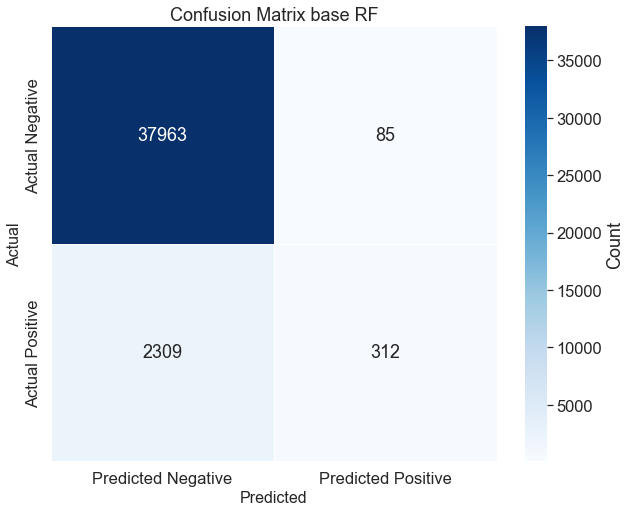

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Your confusion matrix
conf_matrix = np.array([[37963     , 85],
                       [2309     , 312]])

# Create a DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Set a larger font size for all text
sns.set(font_scale=1.5)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar_kws={'label': 'Count'})

# Customize labels and title
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix base RF', fontsize=18)

# Show the plot
plt.show()

In [10]:
# SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import numpy as np

independent_variables = ['age', 'attacking_crossing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
          'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'mentality_aggression', 'mentality_interceptions', 'mentality_penalties', 'mentality_composure']

target_variable = ["big_potential"]

X = df[independent_variables]
y = df[target_variable]

# Convert y to a 1D array
y = np.ravel(y)

# Use StratifiedKFold instead of KFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Lists to store performance metrics for each fold
classification_reports = []
kappa_scores = []
conf_matrices = []

# Lists to accumulate predictions and ground truth for final evaluation
all_y_true = []
all_y_pred = []

# Perform Stratified K-fold cross-validation with SMOTE
for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Apply SMOTE to the training set for each fold
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Create a Random Forest Classifier model
    rf_model = RandomForestClassifier(random_state=42)

    # Train the model on the current fold with the resampled training set
    rf_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the validation fold
    y_val_pred = rf_model.predict(X_val)

    # Accumulate predictions and ground truth for final evaluation
    all_y_true.extend(y_val)
    all_y_pred.extend(y_val_pred)

    # Evaluate the model's performance on the validation fold
    accuracy_fold = accuracy_score(y_val, y_val_pred)
    precision_fold, recall_fold, f1_fold, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
    kappa_fold = cohen_kappa_score(y_val, y_val_pred)

    # Store the classification report, kappa score, and confusion matrix for the current fold
    report_fold = classification_report(y_val, y_val_pred, digits=3)
    classification_reports.append(f"Fold {fold_num}:\n{report_fold}\n")
    kappa_scores.append(kappa_fold)
    conf_matrices.append(confusion_matrix(y_val, y_val_pred))

# Print the combined classification reports for all folds
print("Combined Classification Reports for All Folds:\n")
print("\n".join(classification_reports))

# Print the Kappa scores for each fold
print("Cohen's Kappa Scores for Each Fold:\n", kappa_scores)

# Calculate and print the confusion matrix for the final evaluation on the entire dataset
final_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix for Final Evaluation on Entire Dataset:\n", final_conf_matrix)

# Calculate and print the final classification report and Kappa score on the entire dataset
final_report = classification_report(all_y_true, all_y_pred, digits=3)
final_kappa = cohen_kappa_score(all_y_true, all_y_pred)
print("Final Classification Report on Entire Dataset:\n", final_report)
print("Cohen's Kappa for Final Evaluation on Entire Dataset:", final_kappa)


Combined Classification Reports for All Folds:

Fold 1:
              precision    recall  f1-score   support

           0      0.964     0.952     0.958      3805
           1      0.408     0.477     0.440       262

    accuracy                          0.922      4067
   macro avg      0.686     0.715     0.699      4067
weighted avg      0.928     0.922     0.925      4067


Fold 2:
              precision    recall  f1-score   support

           0      0.966     0.956     0.961      3805
           1      0.447     0.515     0.479       262

    accuracy                          0.928      4067
   macro avg      0.707     0.736     0.720      4067
weighted avg      0.933     0.928     0.930      4067


Fold 3:
              precision    recall  f1-score   support

           0      0.967     0.955     0.961      3805
           1      0.446     0.523     0.482       262

    accuracy                          0.927      4067
   macro avg      0.707     0.739     0.721      4067


In [ ]:
#SMOTE + HP Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

independent_variables = ['age', 'attacking_crossing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
          'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'mentality_aggression', 'mentality_interceptions', 'mentality_penalties', 'mentality_composure']

target_variable = ["big_potential"]

X = df[independent_variables]
y = df[target_variable]

# Convert y to a 1D array
y = np.ravel(y)

# Use StratifiedKFold instead of KFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Lists to store performance metrics for each fold
classification_reports = []
kappa_scores = []
conf_matrices = []

# Lists to accumulate predictions and ground truth for final evaluation
all_y_true = []
all_y_pred = []

# Hyperparameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, None],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Perform Stratified K-fold cross-validation with SMOTE and hyperparameter tuning
for fold_num, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Apply SMOTE to the training set for each fold
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Create a Random Forest Classifier model
    rf_model = RandomForestClassifier(random_state=42)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='f1_macro', cv=3)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the validation fold
    y_val_pred = best_model.predict(X_val)

    # Accumulate predictions and ground truth for final evaluation
    all_y_true.extend(y_val)
    all_y_pred.extend(y_val_pred)

    # Evaluate the model's performance on the validation fold
    accuracy_fold = accuracy_score(y_val, y_val_pred)
    precision_fold, recall_fold, f1_fold, _ = precision_recall_fscore_support(y_val, y_val_pred, average='binary')
    kappa_fold = cohen_kappa_score(y_val, y_val_pred)

    # Store the classification report, kappa score, and confusion matrix for the current fold
    report_fold = classification_report(y_val, y_val_pred, digits=3)
    classification_reports.append(f"Fold {fold_num}:\n{report_fold}\n")
    kappa_scores.append(kappa_fold)
    conf_matrices.append(confusion_matrix(y_val, y_val_pred))

# Print the combined classification reports for all folds
print("Combined Classification Reports for All Folds:\n")
print("\n".join(classification_reports))

# Print the Kappa scores for each fold
print("Cohen's Kappa Scores for Each Fold:\n", kappa_scores)

# Calculate and print the confusion matrix for the final evaluation on the entire dataset
final_conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix for Final Evaluation on Entire Dataset:\n", final_conf_matrix)

# Calculate and print the final classification report and Kappa score on the entire dataset
final_report = classification_report(all_y_true, all_y_pred, digits=3)
final_kappa = cohen_kappa_score(all_y_true, all_y_pred)
print("Final Classification Report on Entire Dataset:\n", final_report)
print("Cohen's Kappa for Final Evaluation on Entire Dataset:", final_kappa)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)


Combined Classification Reports for All Folds:

Fold 1:
              precision    recall  f1-score   support

           0      0.961     0.969     0.965      3805
           1      0.489     0.427     0.456       262

    accuracy                          0.934      4067
   macro avg      0.725     0.698     0.711      4067
weighted avg      0.931     0.934     0.932      4067


Fold 2:
              precision    recall  f1-score   support

           0      0.963     0.972     0.968      3805
           1      0.533     0.462     0.495       262

    accuracy                          0.939      4067
   macro avg      0.748     0.717     0.731      4067
weighted avg      0.936     0.939     0.937      4067


Fold 3:
              precision    recall  f1-score   support

           0      0.963     0.971     0.967      3805
           1      0.521     0.466     0.492       262

    accuracy                          0.938      4067
   macro avg      0.742     0.718     0.729      4067


In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

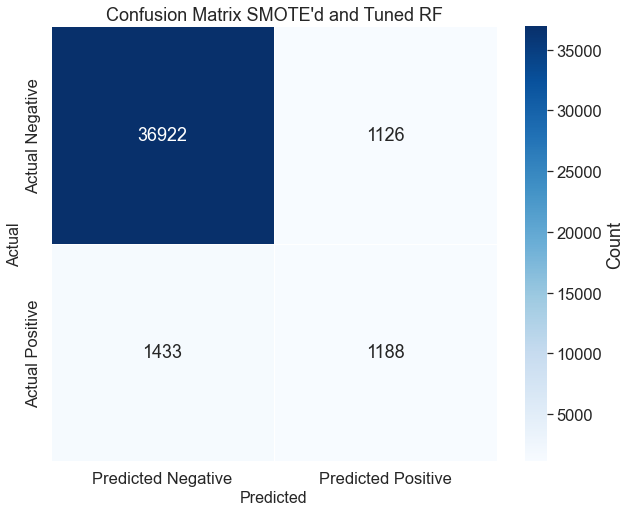

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Your confusion matrix
conf_matrix = np.array([[36922   , 1126],
                       [1433    , 1188]])

# Create a DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Set a larger font size for all text
sns.set(font_scale=1.5)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar_kws={'label': 'Count'})

# Customize labels and title
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix SMOTE\'d and Tuned RF', fontsize=18)

# Show the plot
plt.show()

In [ ]:
# Assuming you have already executed the code up to the model evaluation section...

# Find the indices of true positives
tp_indices = np.where((np.array(all_y_true) == 1) & (np.array(all_y_pred) == 1))[0]

# Extract the rows corresponding to true positives from the original DataFrame
true_positives_df = df.iloc[tp_indices]

# Display the DataFrame with all true positives
print("All True Positives:")
print(true_positives_df)
